Ch3 p35

Solve the set of equations in p34, an then determine the coefficients of the various cubics. Plot the cubic spline curve. Compare the interplates at x = 0.33, x = 0.92, x = 2.05 wiht the tabulated values for ERF(x) (the so-called error function).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import (c_h, cubic_spline_coeff_matrix, cubic_spline_vector, solve_s_vector, 
                    cubic_spline_poly_coeffs, csisv)

In [3]:
pts = np.array([[0.15,0.1680],[0.27,0.2974],[0.76,0.7175],[0.89,0.7918],[1.07,0.8698],[2.11,0.9972]])

tb_h = ['x', 'f(x)']
print(tabulate(pts, tb_h))

   x    f(x)
----  ------
0.15  0.168
0.27  0.2974
0.76  0.7175
0.89  0.7918
1.07  0.8698
2.11  0.9972


In [13]:
h = c_h(pts[...,0])
cscm = cubic_spline_coeff_matrix(pts[...,0], h, 1)
b = cubic_spline_vector(pts, h, 1)
s = solve_s_vector(cscm, h, b, 1)
pcs = cubic_spline_poly_coeffs(s, pts[...,1], h)

print("Cubic Spline Coeffs")
print(cscm)
print("\nRight-hand-side vector")
print(b)
print("\nS-vector solution")
print(s)
print("\nPolynomial coeffs")
print(pcs)

Cubic Spline Coeffs
[[0.   1.22 0.49]
 [0.49 1.24 0.13]
 [0.13 0.62 0.18]
 [0.18 2.44 0.  ]]

Right-hand-side vector
[-1.32591837 -1.71485086 -0.82923077 -1.865     ]

S-vector solution
[ 0.         -0.67775386 -1.01848705 -0.92175019 -0.6963463   0.        ]

Polynomial coeffs
[[-0.94132481 -0.11589564  0.12402162  0.20870731  0.11159396]
 [ 0.         -0.33887693 -0.50924353 -0.4608751  -0.34817315]
 [ 1.09188841  1.05122318  0.63564415  0.50952873  0.36390005]
 [ 0.168       0.2974      0.7175      0.7918      0.8698    ]]


I verified the cubic spline coeffs, r.h.s. vector, and the s-vector solution with the values provided at the back of the book to again validate the code I have written. 

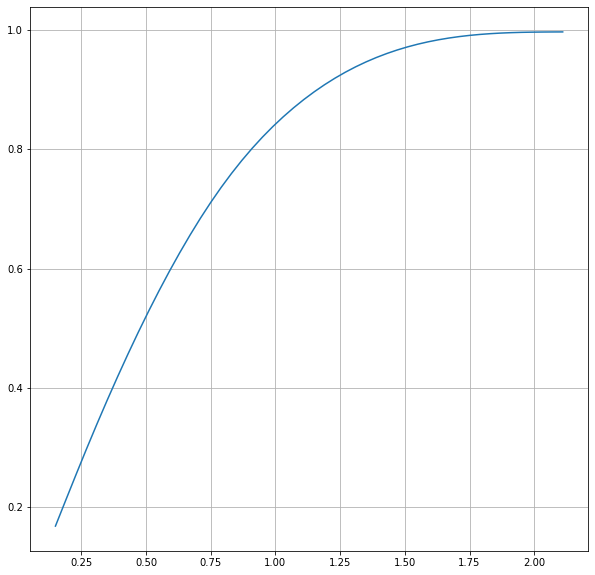

In [12]:
ixv = np.linspace(0.15, 2.11)
iyv = csisv(ixv, pts, 1)

fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
ax.plot(ixv, iyv)
plt.show()

In [8]:
ixv = np.array([0.33, 0.92, 2.05])
iyv = csisv(ixv, pts, 1)
print(iyv)

[0.3592284  0.80667671 0.9970679 ]


I don't have a clue where the tabulated values for the ERF(x) equation are at in the textbook. Since I can't find it I am going to skip this last step. Although, I would like to find it for validation purposes. 